# AE4 Recommender Challenge EDSA
#### Unsupervised_learning_AE4_DSFT21

**Comet experiment**

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="vJUo9ahBGdk2sNcgaTzia7Z0T",
    project_name="unsupervised-movie-predict",
    workspace="katlehomphuthi",
)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/katlehomphuthi/unsupervised-movie-predict/4d389caa08bd4508b5d0ceee7cfde3fb



#### Importing the neccesary software 

In [2]:
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#### Importing all the necessary data

In [3]:
#Movies dataframe
movies_df = pd.read_csv('movies.csv')

#Genome_scores dataframe
gs_df = pd.read_csv('genome_scores.csv')

#Genome_tags dataframe
gt_df = pd.read_csv('genome_tags.csv')

#imbd dataframe
imdb_df = pd.read_csv('imdb_data.csv')

#links dataframe
links_df = pd.read_csv('links.csv')

#tags dataframe
tags_df = pd.read_csv('tags.csv')

#train dataframe
train = pd.read_csv('train.csv')

In [4]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


### Train dataset 

In [5]:
print('The dataset has',len(train), 'observations')

The dataset has 10000038 observations


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [7]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
print('There are ',train["userId"].nunique(), 'users and',train.movieId.nunique(),'movies in the database/dataframe')

There are  162541 users and 48213 movies in the database/dataframe


In [19]:
train_rating = pd.merge(train, movies_df[['movieId', 'title']], on='movieId' )
train_rating.head()

,userId,movieId,rating,timestamp,title
0,5163,57669,4.0,1518349992,In Bruges (2008)
1,87388,57669,3.5,1237455297,In Bruges (2008)
2,137050,57669,4.0,1425631854,In Bruges (2008)
3,120490,57669,4.5,1408228517,In Bruges (2008)
4,50616,57669,4.5,1446941640,In Bruges (2008)


In [20]:
train_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
dtypes: float64(1), int64(3), object(1)
memory usage: 457.8+ MB


**User analysis**

In [21]:
trend = pd.DataFrame(train.groupby('userId')['rating'].mean())
trend['voted'] = pd.DataFrame(train.groupby('userId')['rating'].count())
trend.head()

,rating,voted
userId,,
1,3.910714,28
2,3.416667,72
3,3.691235,251
4,3.308989,89
5,3.885714,35


In [22]:
print('The average rating',round(trend['voted'].mean()))

The average rating 62


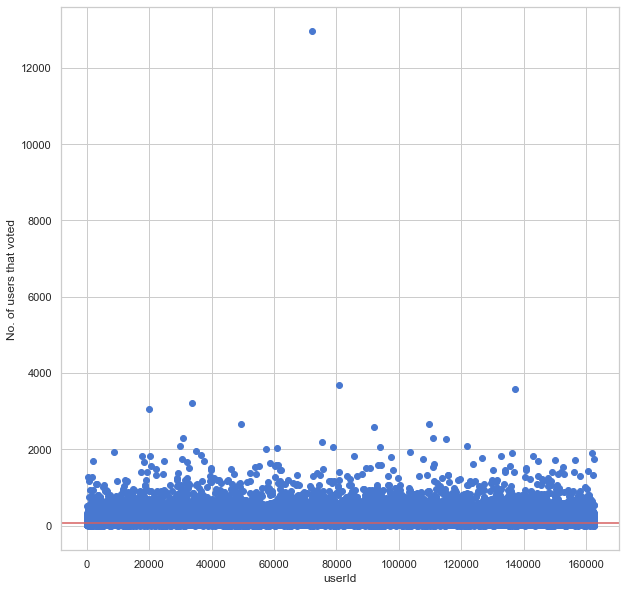

In [24]:
#plotting the average rating of users
plt.figure(figsize = (10,10))
ax = plt.scatter(trend.index,trend['voted'],color = 'b')
plt.axhline(y=62,color='r')
plt.xlabel('userId')
plt.ylabel('No. of users that voted')
plt.show()

In [26]:
users  = trend[trend['voted'] >= 50]

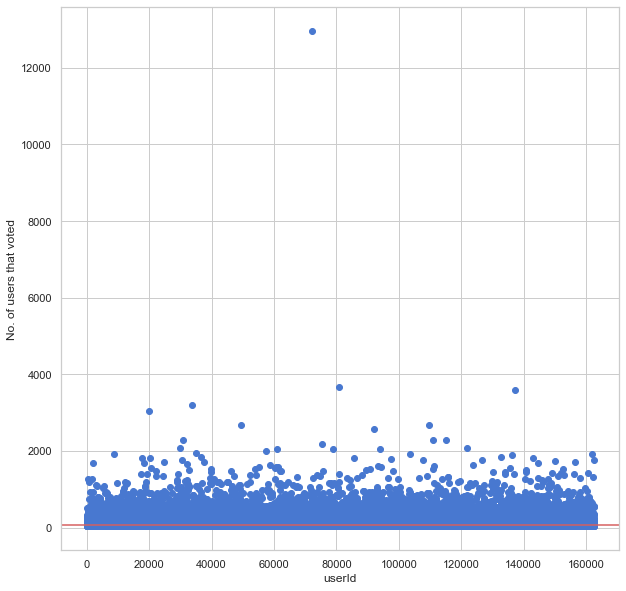

In [28]:
plt.figure(figsize = (10,10))
ax = plt.scatter(users.index,users['voted'],color = 'b')
plt.axhline(y=62,color='r')
plt.xlabel('userId')
plt.ylabel('No. of users that voted')
plt.show()

In [29]:
trend_movies = pd.DataFrame(train.groupby(['movieId'])['rating'].mean())
trend_movies['rated_movies'] = pd.DataFrame(train_rating.groupby('movieId')['rating'].count())
trend_movies.head()

,rating,rated_movies
movieId,,
1,3.889971,23062
2,3.263414,9654
3,3.132325,4727
4,2.878099,968
5,3.059165,4648


In [30]:
avg = trend_movies['rated_movies'].mean()

In [31]:
print(round(avg))

207


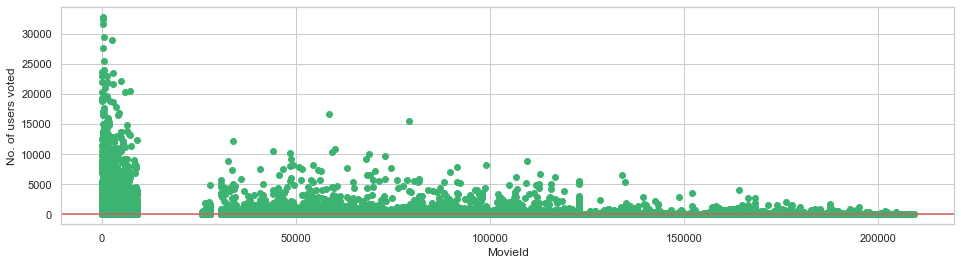

In [32]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(trend_movies.index,trend_movies['rated_movies'],color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [33]:
movies = trend_movies[trend_movies['rated_movies'] > 10]
movies.head()

,rating,rated_movies
movieId,,
1,3.889971,23062
2,3.263414,9654
3,3.132325,4727
4,2.878099,968
5,3.059165,4648


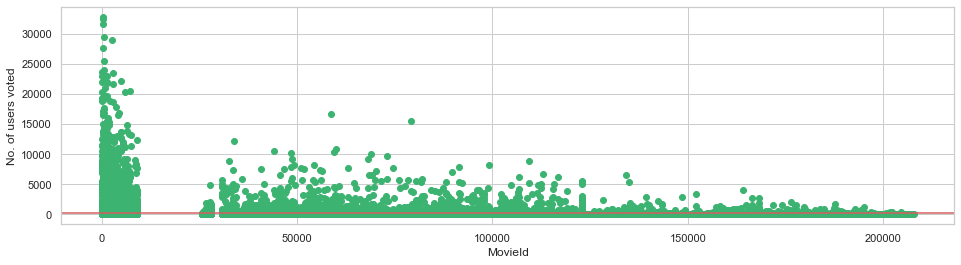

In [34]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(movies.index,movies['rated_movies'],color='mediumseagreen')
plt.axhline(y=207,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

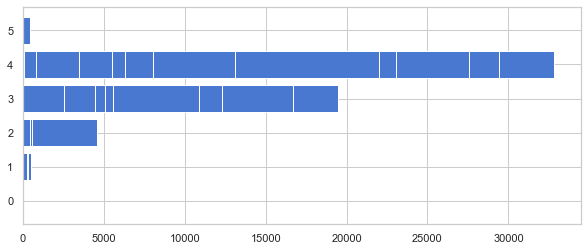

In [30]:
plt.figure(figsize =(10, 4))
ax=plt.barh(trend_movies['rating'].round(),trend_movies['rated_movies'],color='b')
plt.show()

In [35]:
print('There are ',len(users), 'users and',len(movies),'movies in the database/dataframe')

There are  52531 users and 17275 movies in the database/dataframe


In [36]:
train_400 = train[:400000]

train_400.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [37]:
print(train_400['userId'].nunique())
print(train_400['movieId'].nunique())

109266
16728


In [38]:
train_400 = pd.merge(train,movies['rated_movies'],on = 'movieId')

In [39]:
train_400.head()

,userId,movieId,rating,timestamp,rated_movies
0,5163,57669,4.0,1518349992,4253
1,87388,57669,3.5,1237455297,4253
2,137050,57669,4.0,1425631854,4253
3,120490,57669,4.5,1408228517,4253
4,50616,57669,4.5,1446941640,4253


In [40]:
train_400 = pd.merge(train_400,users['voted'],on = 'userId')

In [41]:
train_400.head()

,userId,movieId,rating,timestamp,rated_movies,voted
0,87388,57669,3.5,1237455297,4253,104
1,87388,48394,3.5,1237455605,7961,104
2,87388,1196,4.5,1237490423,22956,104
3,87388,50,4.5,1237455179,22032,104
4,87388,296,4.0,1237455238,31697,104


In [42]:
train_400.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7592312 entries, 0 to 7592311
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   userId        int64  
 1   movieId       int64  
 2   rating        float64
 3   timestamp     int64  
 4   rated_movies  int64  
 5   voted         int64  
dtypes: float64(1), int64(5)
memory usage: 405.5 MB


In [43]:
train_400.isnull().sum()

userId          0
movieId         0
rating          0
timestamp       0
rated_movies    0
voted           0
dtype: int64

In [44]:
train_400.sort_values( by = ['rated_movies'])

,userId,movieId,rating,timestamp,rated_movies,voted
3193165,17008,4693,3.0,1077148787,10,439
2328923,36618,163496,3.0,1504810728,10,1847
2328925,36618,141520,3.0,1486420901,10,1847
3327310,142013,62208,5.0,1554945889,10,491
154949,102108,132638,3.5,1455817451,10,168
...,...,...,...,...,...,...
4145021,151959,318,5.0,901612058,32831,72
6583746,138817,318,5.0,1186503570,32831,84
6672099,12969,318,3.5,1170425593,32831,86
3904140,110847,318,5.0,1280082197,32831,324


In [46]:
train_400 = train_400[train_400['voted'] > 62]

In [47]:
train_400.head()


,userId,movieId,rating,timestamp,rated_movies,voted
0,87388,57669,3.5,1237455297,4253,104
1,87388,48394,3.5,1237455605,7961,104
2,87388,1196,4.5,1237490423,22956,104
3,87388,50,4.5,1237455179,22032,104
4,87388,296,4.0,1237455238,31697,104


In [49]:
print(train_400['userId'].nunique())
print(train_400['movieId'].nunique())
print(len(train_400))

42180
17275
7017526
